In [1]:
import numpy as np
from numpy import sin, cos, cosh, sqrt, sinh
import matplotlib.pyplot as plt
from constants import *

In [2]:
from scipy.integrate import odeint
from getx_v2 import get_x, get_x_PN
from fn import rx, phitx, phiv, rtx
from hypmik3pn import get_u, get_u_v2

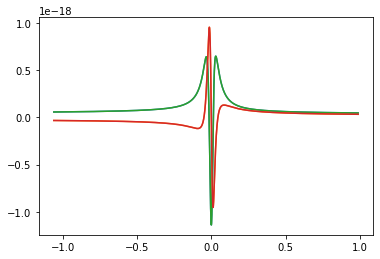

In [3]:
old_mik=np.genfromtxt('hypwf_old_M200_et1.1_b50.txt')
new_mik=np.genfromtxt('hypwf_old_M200_et1.1_b50.txt')
tarr_mik=old_mik[:,0]
plt.plot(tarr_mik,old_mik[:,1])
plt.plot(tarr_mik,old_mik[:,2])
plt.plot(tarr_mik,new_mik[:,1])
plt.plot(tarr_mik,new_mik[:,2])
plt.show()

In [4]:
# tarr=np.linspace(-1,1,1000)
tarr=tarr_mik

In [5]:
M1=200
B1=50
et0=1.1

eta=0.25
inc=pi/4
Mpc=1e6*pc

In [6]:
time=M1*tsun
dis=M1*dsun
R=Mpc
scale=R/dis

In [7]:
from eval_max import get_max, Fomg

In [8]:
dimless_peak=get_max(eta,B1,et0)
peak=dimless_peak/(2*np.pi*time)
peak

Optimization terminated successfully.
         Current function value: -0.010464
         Iterations: 38
         Function evaluations: 79


7.816144560929709

In [9]:
#x0=get_x_PN(et0,eta,B1,3)[0] 
x0=get_x_PN(et0,eta,B1)
n0=x0**(3/2)
t_arr=tarr/time
t_i=t_arr[0]
t_f=t_arr[len(t_arr)-1]
l_i=n0*t_i
u_i=get_u(l_i,et0,eta,B1,3)
# Larr=n0*t_arr
len(t_arr)

2052

In [10]:
from rr_method1 import solve_method1_rr

In [11]:
y0=[et0,n0,u_i]

In [12]:
sol=solve_method1_rr(eta,B1,y0,t_i,t_f,t_arr);
u_method1=sol[2]

In [13]:
from rr_method2 import solve_method2_rr

In [14]:
Y0=[et0,n0,l_i]
sol2=solve_method2_rr(eta,B1,Y0,t_i,t_f,t_arr);
l_method2=sol2[2]
n_method2=sol2[1]
x_method2=n_method2**(2/3)
et_method2=sol2[0]
u_method2=get_u_v2(l_method2,et_method2,eta,x_method2,3)

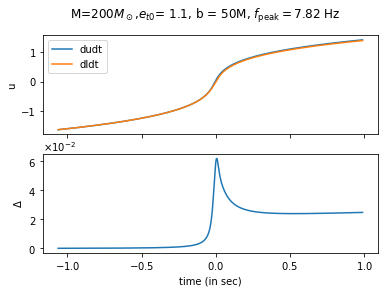

In [15]:
fig, axs = plt.subplots(2, 1, sharex=True)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0.2)
axs[0].plot(tarr,u_method1,label='dudt')
axs[0].plot(tarr,u_method2,label='dldt')
axs[0].set_ylabel('u')
axs[0].legend()
axs[0].ticklabel_format(axis='x',style='sci',scilimits=(0,0),useMathText=True)

axs[1].plot(tarr,u_method1-u_method2)
axs[1].set_ylabel(r'$\Delta$')
axs[1].set_xlabel('time (in sec)')
axs[1].ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)


fig.suptitle('M='+str(M1)+r"$M_\odot$,"'$e_{t0}$= '+str(et0)+', b = '
             +str(B1)+r"M"+r', $f_{\rm{peak}}=$'+str("{:.2f}".format(peak))+' Hz')


#fig.suptitle('M='+str(M1)+r"$M_\odot$,"' $e_{t0}$= '+str(et0)+', b = '
             #+str(B1)+r"M")
plt.savefig("diffu_M%s_e%s_b%s.jpg"%(M1,et0,B1), dpi=1200)
plt.show()

In [16]:
def h(order,uarr):
    step=len(tarr)
    hp_arr=np.zeros(step)
    hx_arr=np.zeros(step)
    for i in range(step):
#         l=larr[i]
        et=et0
        u=uarr[i]
        x=get_x(et0,eta,B1,order)[0]   
        phi=phiv(eta,et,u,x,order)
        r1=rx(eta,et,u,x,order)
        z=1/r1
        phit=phitx(eta,et,u,x,order)
        rt=rtx(eta,et,u,x,order)
        phi=phiv(eta,et,u,x,order)
        hp_arr[i]=(-eta*(sin(inc)**2*(z-r1**2*phit**2-rt**2)+(1+cos(inc)**2)*((z
        +r1**2*phit**2-rt**2)*cos(2*phi)+2*r1*rt*phit*sin(2*phi))))
        hx_arr[i]=(-2*eta*cos(inc)*((z+r1**2*phit**2-rt**2)*sin(2*phi)-2*r1*rt*phit*cos(2*phi)))
    return hp_arr, hx_arr

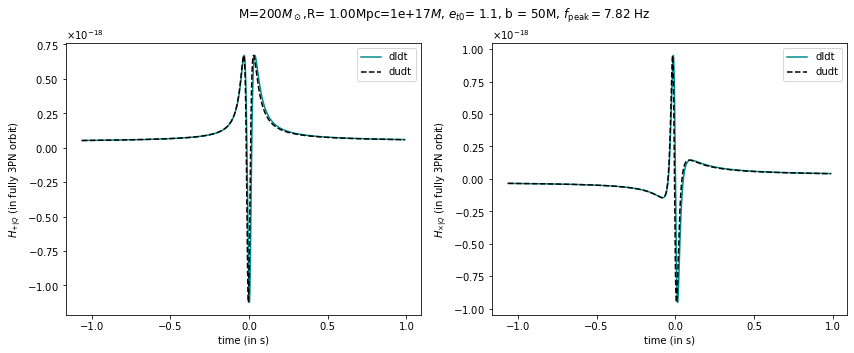

In [26]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(tarr,h(3,u_method2)[0]/scale,color='darkcyan',label='dldt')
plt.plot(tarr,h(3,u_method1)[0]/scale,color='k',linestyle='--',label='dudt')
plt.xlabel('time (in s)')
plt.ylabel(r'$H_{+|Q}$ (in fully 3PN orbit)')
plt.legend()
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)

plt.subplot(1,2,2)
plt.plot(tarr,h(3,u_method2)[1]/scale,color='darkcyan',label='dldt')
plt.plot(tarr,h(3,u_method1)[1]/scale,color='k',linestyle='--',label='dudt')
plt.xlabel('time (in s)')
plt.ylabel(r'$H_{\times|Q}$ (in fully 3PN orbit)')
plt.legend()
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)

plt.suptitle('M='+str(M1)+r"$M_\odot$,"'R= '+str("{:.2f}".format(R/Mpc))
             +'Mpc='+str("{:.0e}".format(scale))+r"$M$"', $e_{t0}$= '+str(et0)+', b = '
             +str(B1)+r"M"+r', $f_{\rm{peak}}=$'+str("{:.2f}".format(peak))+' Hz')

plt.savefig("all_M%s_e%s_b%s.jpeg"%(M1,et0,B1),dpi=1000)
plt.show()


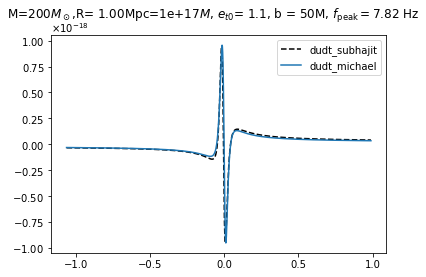

In [30]:
# plt.plot(tarr,h(3,u_method2)[1]/scale,color='darkcyan',label='dldt_michael')
plt.plot(tarr,h(3,u_method1)[1]/scale,color='k',linestyle='--',label='dudt_subhajit')
# plt.plot(tarr_mik,new_mik[:,2],label='dldt_michael')
plt.plot(tarr_mik,old_mik[:,2],label='dudt_michael')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
plt.suptitle('M='+str(M1)+r"$M_\odot$,"'R= '+str("{:.2f}".format(R/Mpc))
             +'Mpc='+str("{:.0e}".format(scale))+r"$M$"', $e_{t0}$= '+str(et0)+', b = '
             +str(B1)+r"M"+r', $f_{\rm{peak}}=$'+str("{:.2f}".format(peak))+' Hz')
plt.legend()
plt.show()

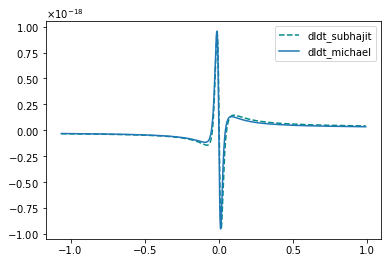

In [32]:
plt.plot(tarr,h(3,u_method2)[1]/scale,color='darkcyan',linestyle='--',label='dldt_subhajit')
# plt.plot(tarr,h(3,u_method1)[1]/scale,color='k',linestyle='--',label='dudt_subhajit')
plt.plot(tarr_mik,new_mik[:,2],label='dldt_michael')
# plt.plot(tarr_mik,old_mik[:,2],label='dudt_michael')
plt.ticklabel_format(axis='y',style='sci',scilimits=(0,0),useMathText=True)
plt.legend()
plt.show()